## Structure function vs power spectrum

Following the autocorrelation theorem presented in Fig.1 of Crovisier & Dickey 1983
http://adsabs.harvard.edu/abs/1983A%26A...122..282C

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
from noisegen import fbm2d
from powspec import powspec
from scipy.signal import correlate2d

Creation of an exponentiated fractional Brownian motion map with a power law of 3.6

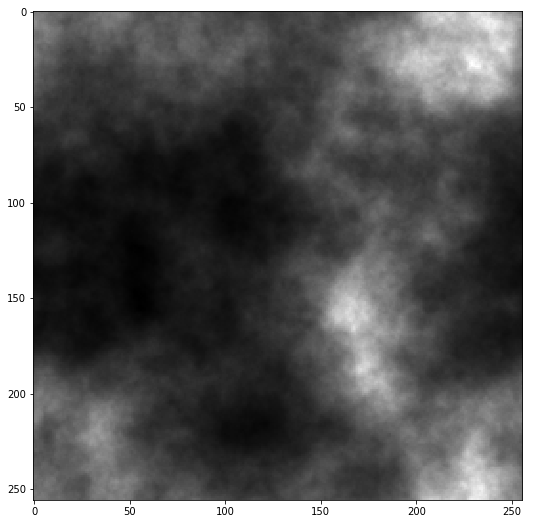

In [48]:
N = 256
efbm = np.exp(0.5*fbm2d(-3.6,N,N))

figure(figsize(9,9))
imshow(efbm,cmap='gray')

Plot its power spectrum

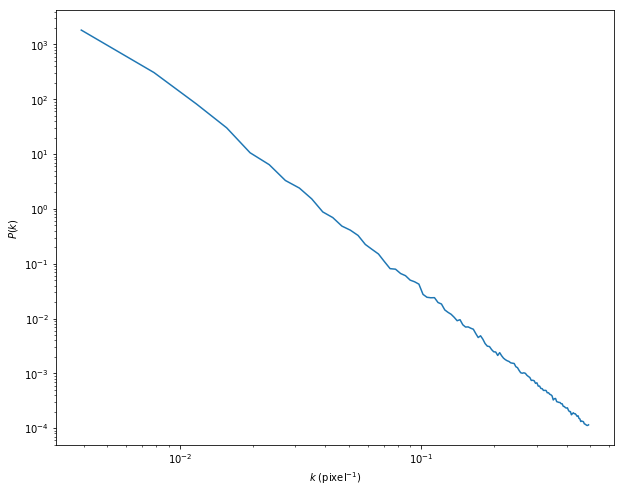

In [49]:
tab_k,spec_k = powspec(efbm, reso=1.0)

figure(figsize=(10,8))
plot(tab_k, spec_k)
xlabel(r'$k$ (pixel$^{-1}$)')
ylabel(r'$P(k)$')
xscale('log')
yscale('log')

Inverse Fourier transform of the power spectrum, which should correspond to the autocorrelation function

(0, 128.0)

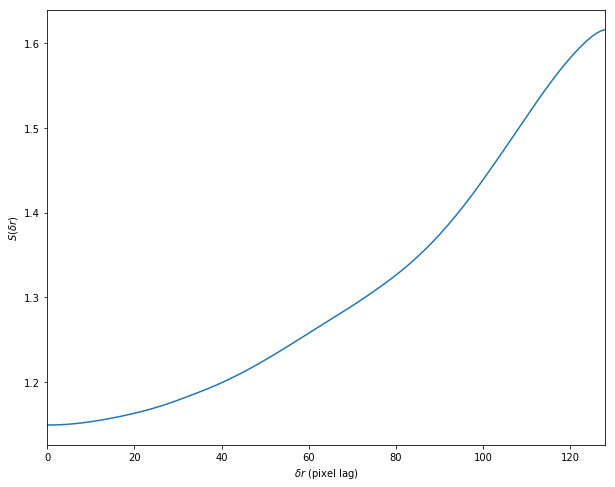

In [50]:
FTefbm=np.fft.fft2(efbm) / np.float(N)
ps2D = np.abs( FTefbm )**2
ACefbm = np.fft.ifft2(ps2D).real

#figure(figsize(9,9))
#imshow(ACefbm,cmap='gray')

figure(figsize=(10,8))
plot(np.diag(np.fft.fftshift(ACefbm)))
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$S(\delta r)$')
xlim((0,N/2.))

Now if we calculate the autocorrelation function of the efBm.

(0, 128.0)

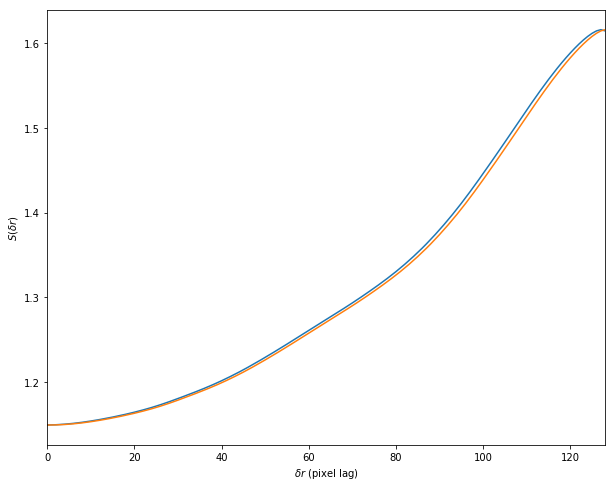

In [57]:
#Sr = correlate2d(efbm,efbm,mode='same',boundary='wrap')

spec_r2 = np.diag(Sr)/np.float(N)**2.

figure(figsize=(10,8))
plot(spec_r2,label='ACF')
plot(np.diag(np.fft.fftshift(ACefbm)),label='ifft PS')
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$S(\delta r)$')
xlim((0,N/2.))

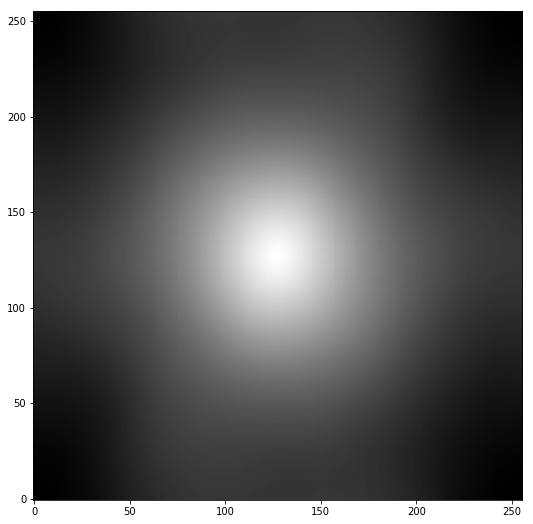

In [54]:
figure(figsize(9,9))
imshow(Sr,cmap='gray',origin='bottom')